In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bus = pd.read_csv('mac_business.csv',encoding = 'latin1')
edu = pd.read_csv('mac_education.csv',encoding = 'latin1')
graph = pd.read_csv('mac_graphicdesign.csv',encoding = 'latin1')
med = pd.read_csv('mac_medical.csv',encoding = 'latin1')
mus = pd.read_csv('mac_music.csv',encoding = 'latin1')
photo = pd.read_csv('mac_photography.csv',encoding = 'latin1')
vid = pd.read_csv('mac_video.csv',encoding = 'latin1')
#l = bus['languages'].str.split(',', expand=True).rename(columns = lambda x: "language"+str(x+1))

In [4]:
# Putting all datasets togehter
mac_store = pd.concat([bus,edu,graph,med,mus,photo,vid])

/Users/drucila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
mac_store = mac_store.drop(['Unnamed: 2', 'Unnamed: 6'], axis=1)

In [ ]:
# Dealing with the Languages

In [7]:
l = mac_store['languages'].str.split(',', expand=True).rename(columns = lambda x: "language"+str(x+1))
l['col_total'] = l.apply(lambda x: x.count(), axis=1)
df1 = l.iloc[:,-1]
mac = pd.concat([mac_store, df1], axis=1, sort=False)
mac.rename(columns = {'col_total':'total_languages'}, inplace = True) 
macy = mac.drop(['languages'], axis=1)
mac_apps = macy

In [24]:
# Lets check if there are any null values in the dataset
mac_apps.isnull().any()

category           False
compatibility      False
name               False
price              False
rating             False
size               False
total_languages    False
dtype: bool

In [25]:
mac_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14231 entries, 0 to 1511
Data columns (total 7 columns):
category           14231 non-null object
compatibility      14231 non-null object
name               14231 non-null object
price              14231 non-null float64
rating             14231 non-null float64
size               14231 non-null object
total_languages    14231 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 889.4+ KB


In [92]:
mac_apps['price_category'] = mac_apps['price'].apply(lambda x:1 if x > 0 else 0)

In [21]:
mac_apps['price'] = mac_apps['price'].str.replace('$', '')
mac_apps['price'] = mac_apps['price'].round()
mac_apps['price'] = mac_apps['price'].replace({'ght å© 2014 - 2019, Brave Cakes Studio':-1})
mac_apps['price'] = mac_apps['price'].replace({'Free':0})
mac_apps['price'] = mac_apps['price'].astype(float)
mac_apps['price'] = mac_apps['price'].astype(int)

In [72]:
mac_apps['app_size'] = mac_apps['app_size'].replace({'no':0})

In [23]:
mac_apps.loc[:, "name"] = mac_apps.loc[:, "name"].fillna("None")
mac_apps.loc[:, "price"] = mac_apps.loc[:, "price"].fillna(-1)
mac_apps.loc[:, "rating"] = mac_apps.loc[:, "rating"].fillna(0)
mac_apps.loc[:, "size"] = mac_apps.loc[:, "size"].fillna('None')

In [35]:
mac_apps['size'] = mac_apps['size'].replace({'none':'0 B'})

In [95]:
mac_apps.to_csv('macappstore.csv')

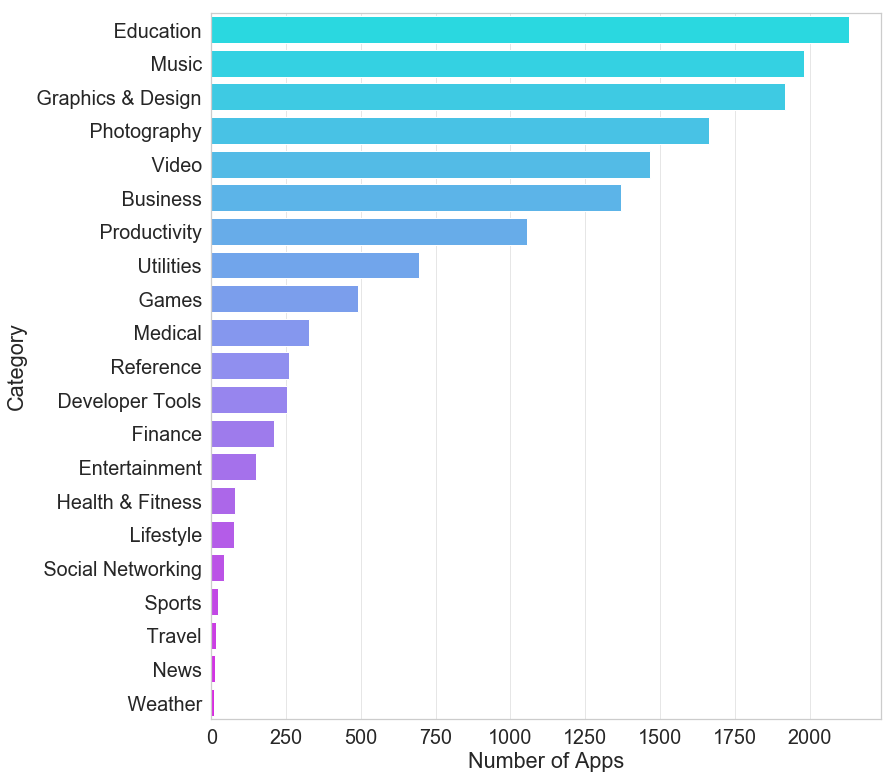

In [404]:
# How many apps in each category 
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
x = sns.countplot(y = 'category', data = mac_apps, palette= "cool", order = mac_apps['category'].value_counts().index)
plt.xlabel('Number of Apps') 
plt.ylabel('Category')
plt.show(x)

In [81]:
large = mac_apps[mac_apps['size'].str.contains('GB')]
medium = mac_apps[mac_apps['size'].str.contains('MB')]
small = mac_apps[mac_apps['size'].str.contains('KB')]

In [266]:
# Large Apps: GB
large_size = large[['category','name','size', 'price', 'total_languages']].sort_values(by='size', ascending = False)
large_size['size'] = large_size['size'].str.replace('GB', '')
large_size['size'] = large_size['size'].astype(float)
# Medium Apps : MB
medium_size = medium[['category','name','size', 'price', 'total_languages']].sort_values(by='size', ascending = False)
medium_size['size'] = medium_size['size'].str.replace('MB', '')
medium_size['size'] = medium_size['size'].astype(float)
# Small Apps : KB
small_size = small[['category','name','size', 'price', 'total_languages']].sort_values(by='size', ascending = False)
small_size['size'] = small_size['size'].str.replace('KB', '')
small_size['size'] = small_size['size'].astype(float)

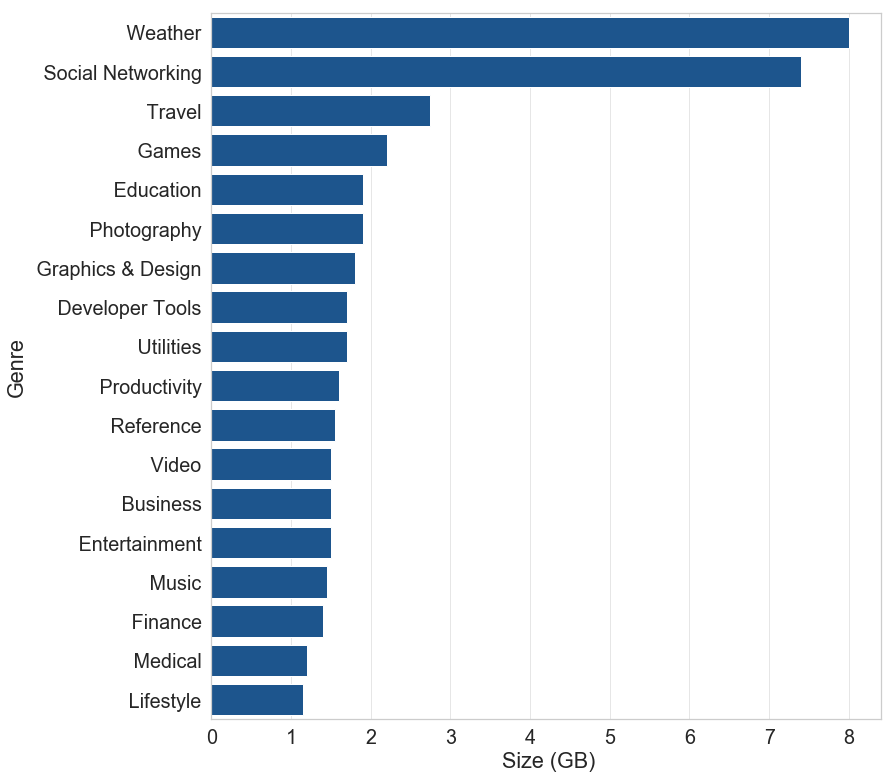

In [388]:
result = large_size.groupby(["category"])['size'].aggregate(np.median).reset_index().sort_values('size', ascending = False)
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
f = sns.barplot(x="size", y="category", data=result, label=" ", color="#0b559f", ci = None)
plt.xlabel(' Size (GB)') 
plt.ylabel('Genre')
plt.show(f)

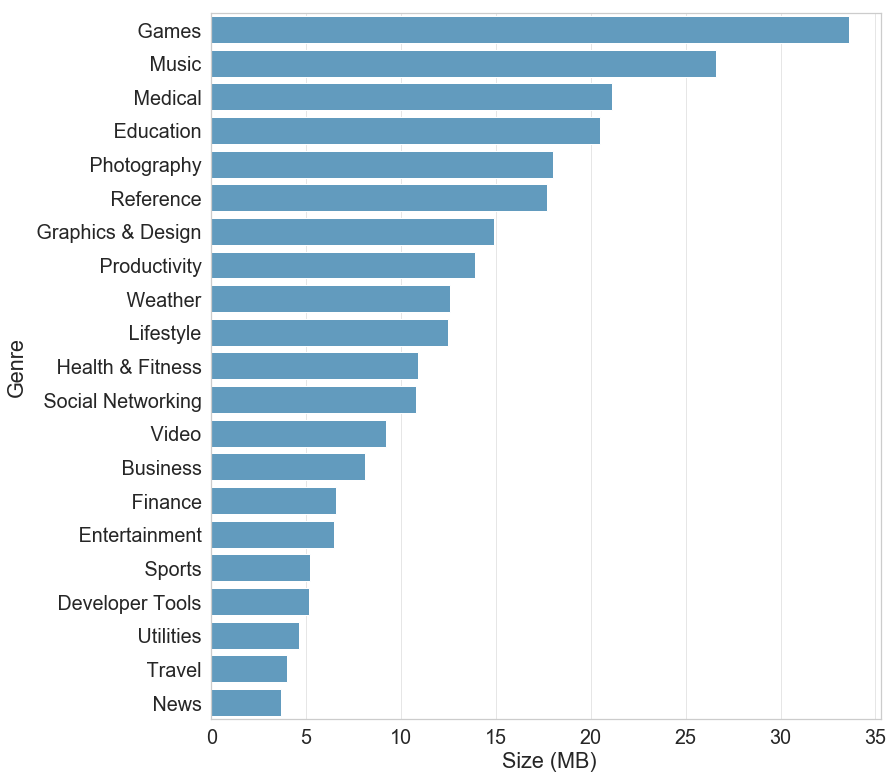

In [387]:
result = medium_size.groupby(["category"])['size'].aggregate(np.median).reset_index().sort_values('size', ascending = False)
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
m = sns.barplot(x="size", y="category", data=result, label=" ", color="#539ecd", ci = None)
plt.xlabel(' Size (MB)') 
plt.ylabel('Genre')
plt.show(m)

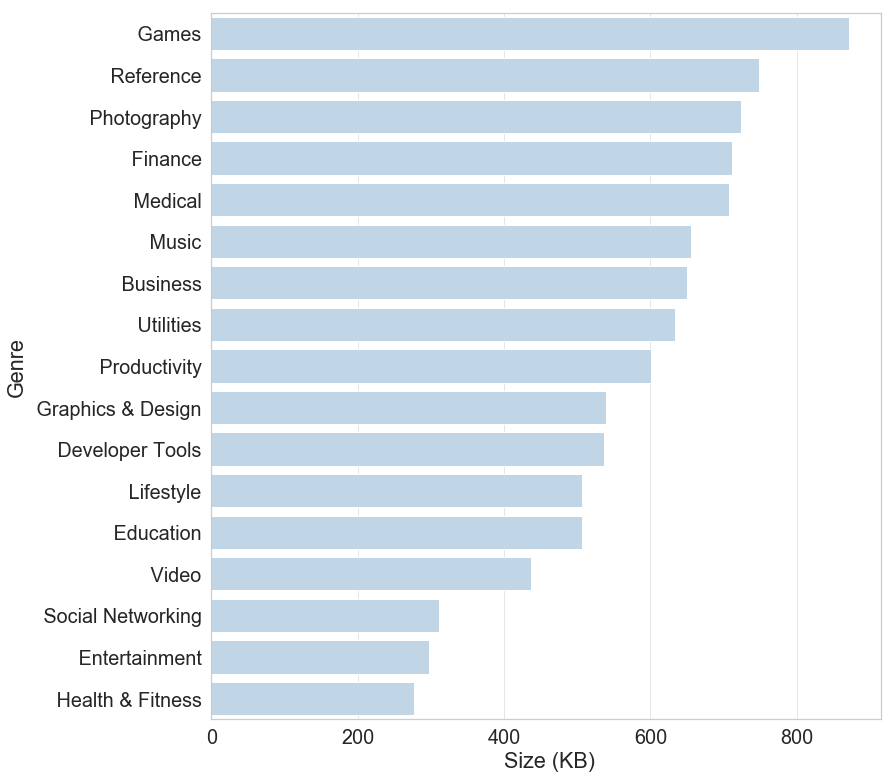

In [386]:
result = small_size.groupby(["category"])['size'].aggregate(np.median).reset_index().sort_values('size', ascending = False)
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
s = sns.barplot(x="size", y="category", data=result, label=" ", color="#bad6eb", ci = None)
plt.xlabel(' Size (KB)') 
plt.ylabel('Genre')
plt.show(s)

In [361]:
price_c = mac_apps['price_category'].value_counts().reset_index()
price_c.rename(columns={'index':'price_category', 'price_category':'count'}, inplace=True)

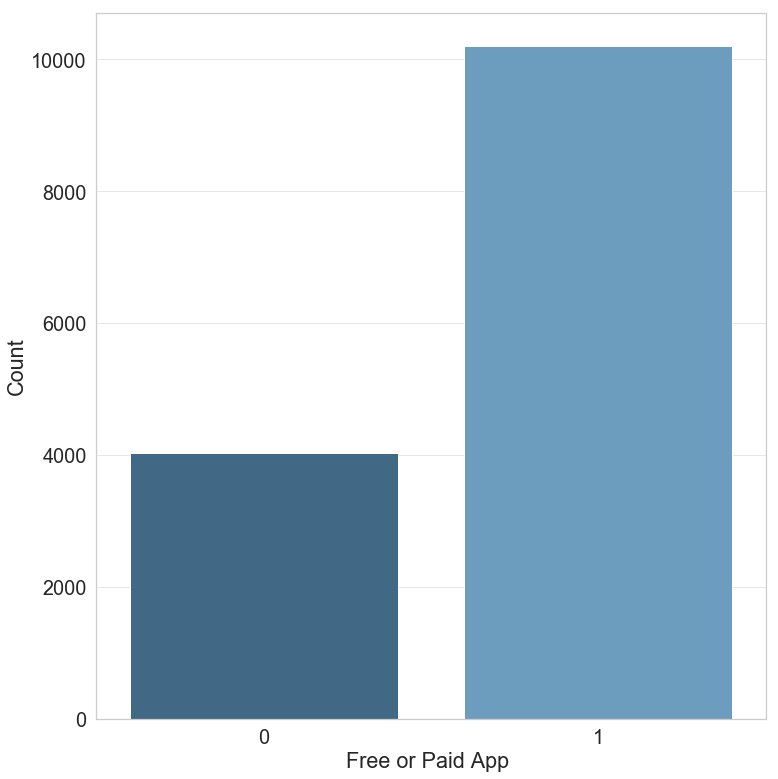

In [362]:
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
s = sns.barplot(x="price_category", y="count", data=price_c, label=" ", palette = "Blues_d", ci = None)
plt.xlabel('Free or Paid App ') 
plt.ylabel('Count')
plt.show(s)

In [340]:
# Filtered Paid
paid = mac_apps.query('price_category == 1')
free = mac_apps.query('price_category == 0')

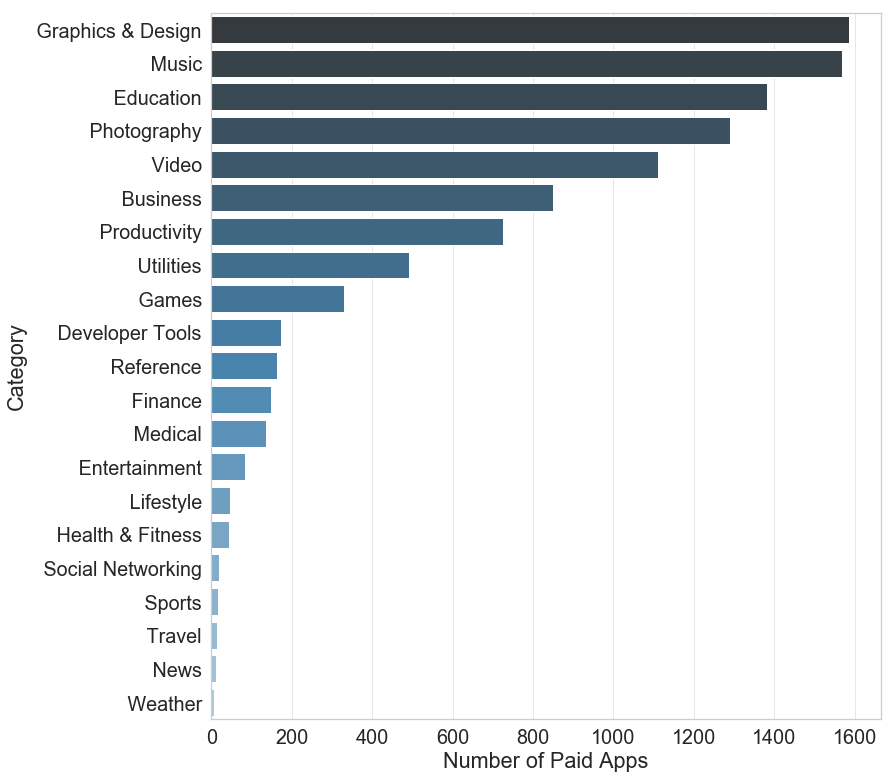

In [408]:
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
p = sns.countplot(y = 'category', data = paid, palette= "Blues_d", order = paid['category'].value_counts().index)
plt.xlabel('Number of Paid Apps') 
plt.ylabel('Category')
plt.show(p)

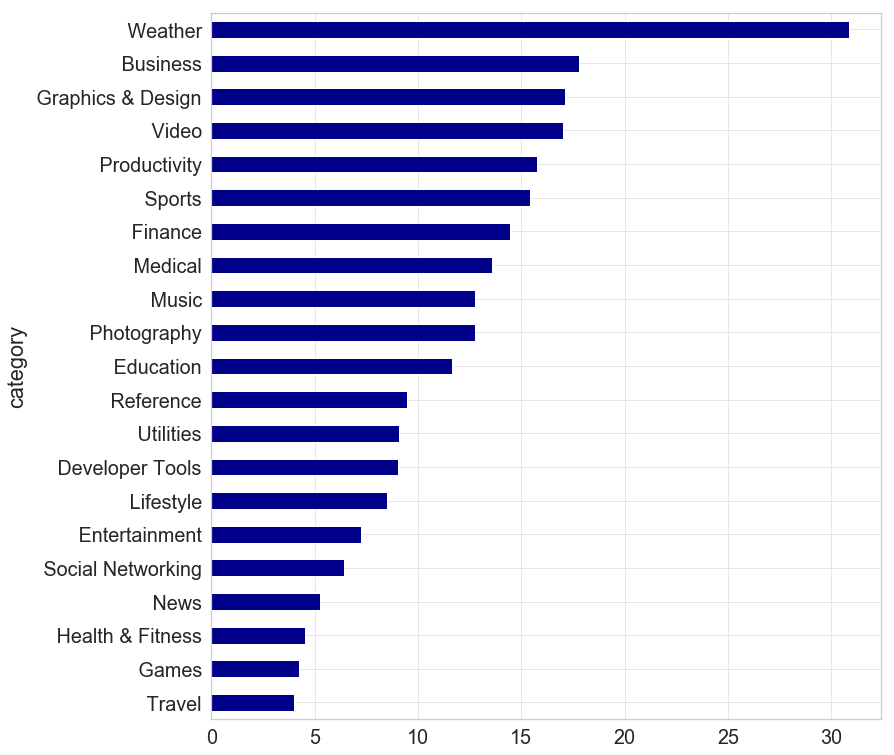

In [467]:
# Average Price
paid.groupby('category', as_index=True)['price'].mean().sort_values().plot(kind='barh', color = 'darkblue')

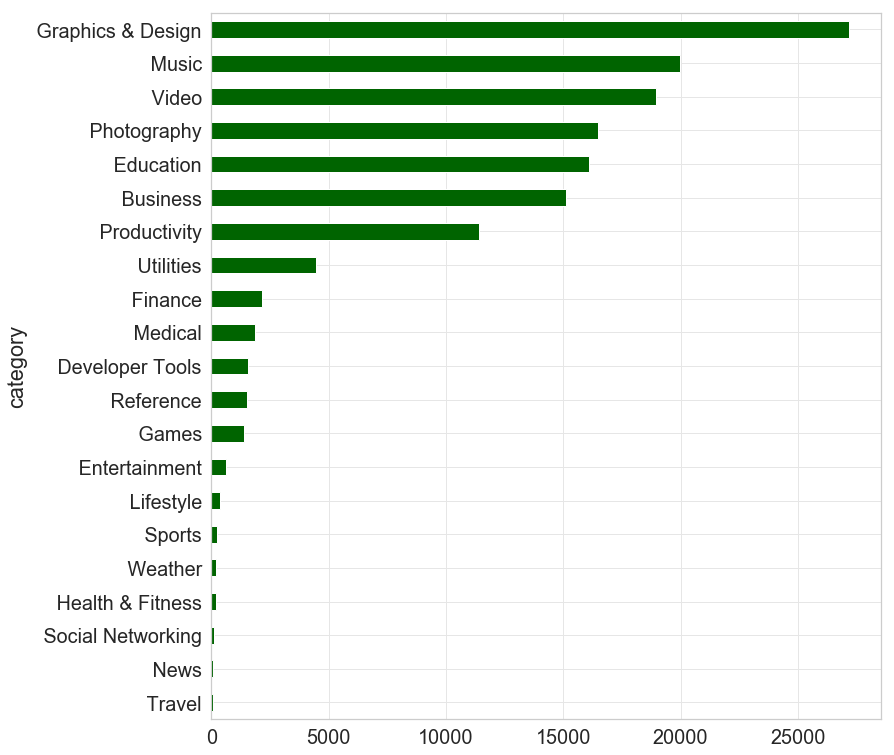

In [420]:
# Total Price 
paid.groupby('category', as_index=True)['price'].sum().sort_values().plot(kind='barh', color = 'darkgreen')

In [438]:
graphics = paid[paid['category'].str.contains("Graphics & Design")]
music = paid[paid['category'].str.contains("Music")]
video = paid[paid['category'].str.contains("Video")]
photo = paid[paid['category'].str.contains("Photography")]
education = paid[paid['category'].str.contains("Education")]
business = paid[paid['category'].str.contains("Business")]

In [460]:
g = graphics.sort_values(by='price', ascending=False)
top_expensive_gapps = g.head(15)
m = music.sort_values(by='price', ascending=False)
top_expensive_mapps = m.head(15)
v = video.sort_values(by='price', ascending=False)
top_expensive_vapps = v.head(15)
p = photo.sort_values(by='price', ascending=False)
top_expensive_papps = p.head(15)
e = education.sort_values(by='price', ascending=False)
top_expensive_eapps = e.head(15)
b = business.sort_values(by='price', ascending=False)
top_expensive_bapps = b.head(15)

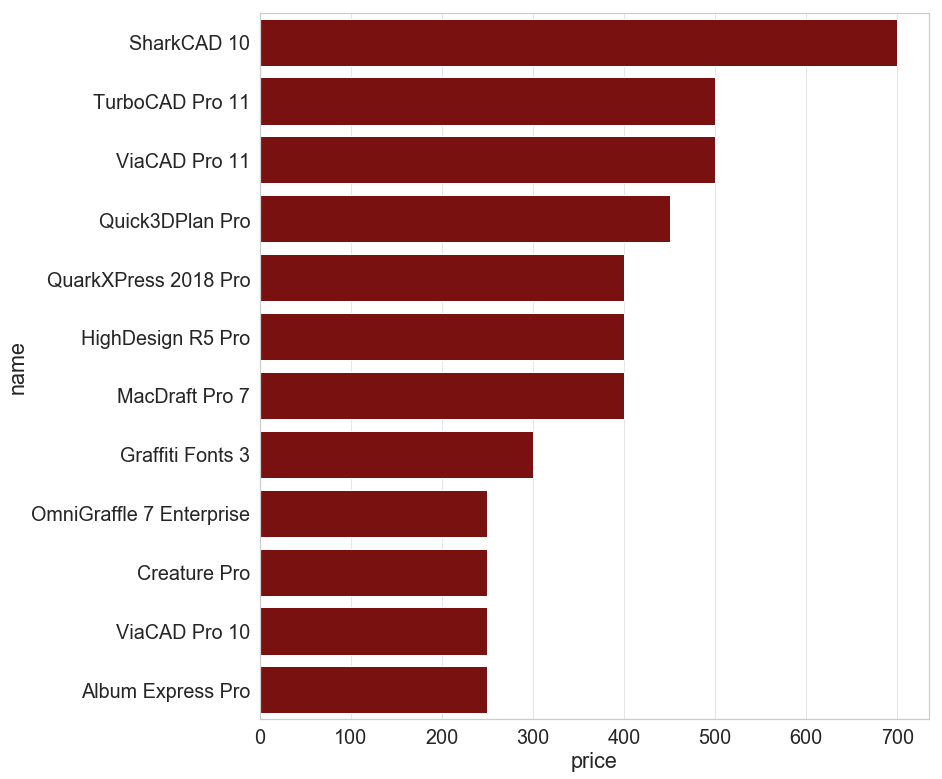

In [459]:
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
s = sns.barplot(x="price", y="name", data=top_expensive_gapps, label=" ", color="darkred", ci = None)

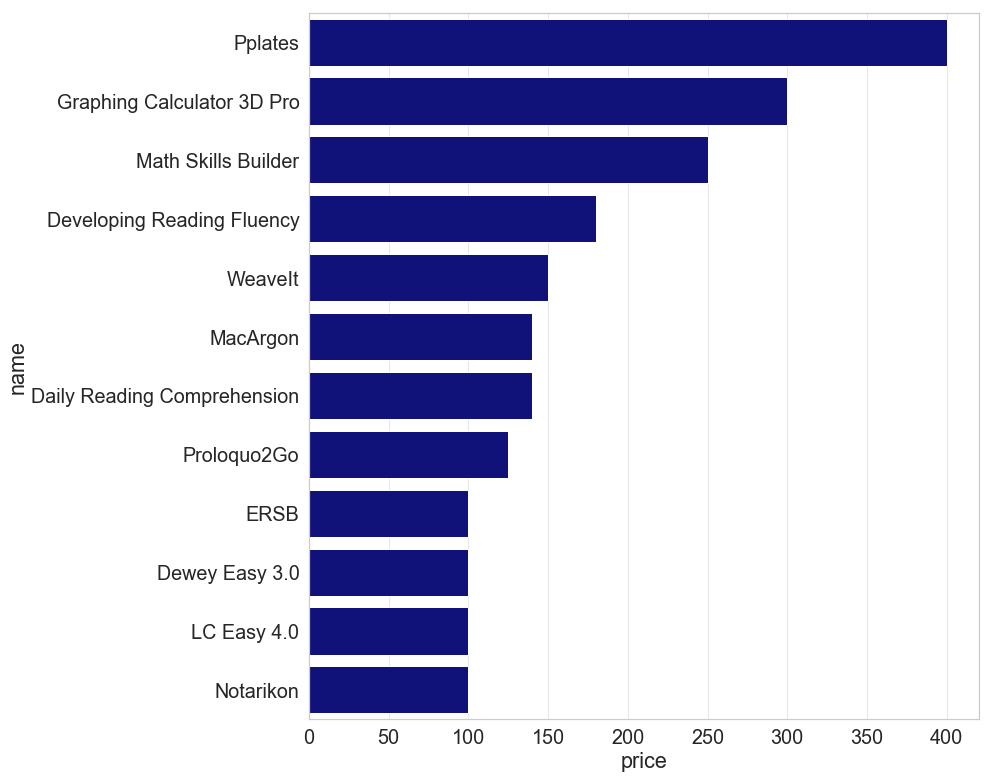

In [462]:
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
s = sns.barplot(x="price", y="name", data=top_expensive_eapps, label=" ", color="darkblue", ci = None)

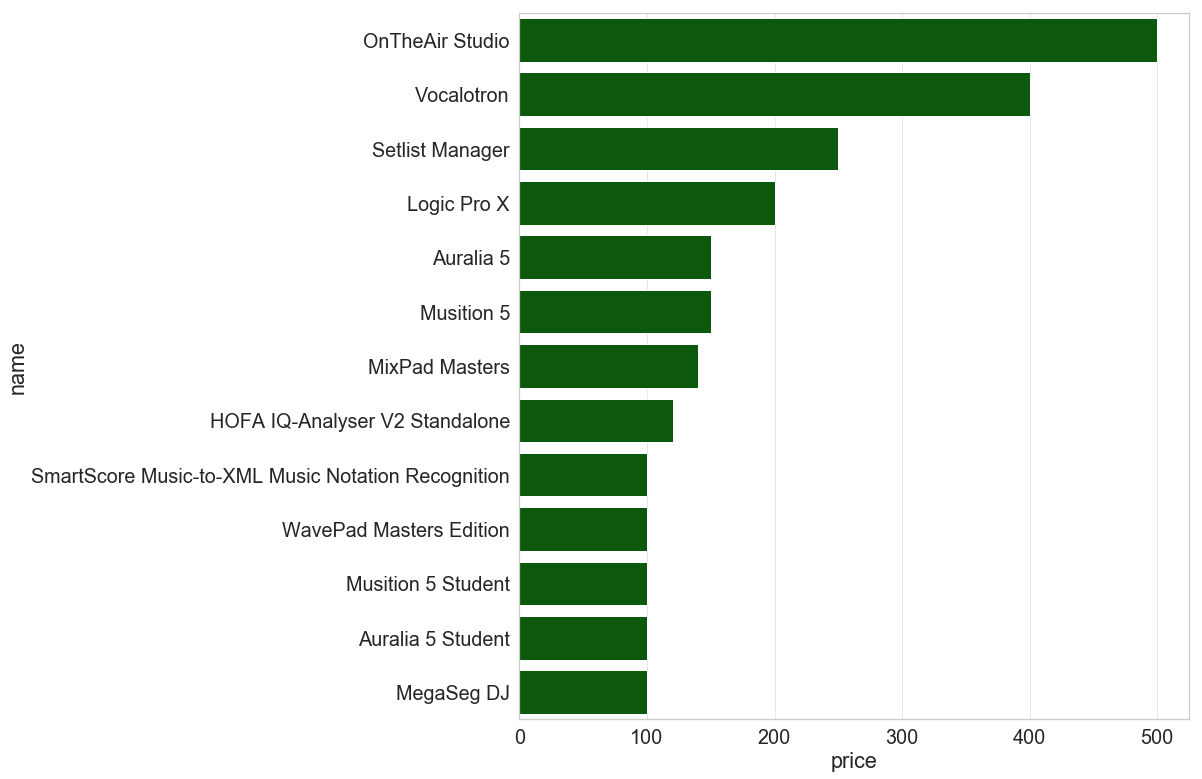

In [463]:
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
s = sns.barplot(x="price", y="name", data=top_expensive_mapps, label=" ", color="darkgreen", ci = None)

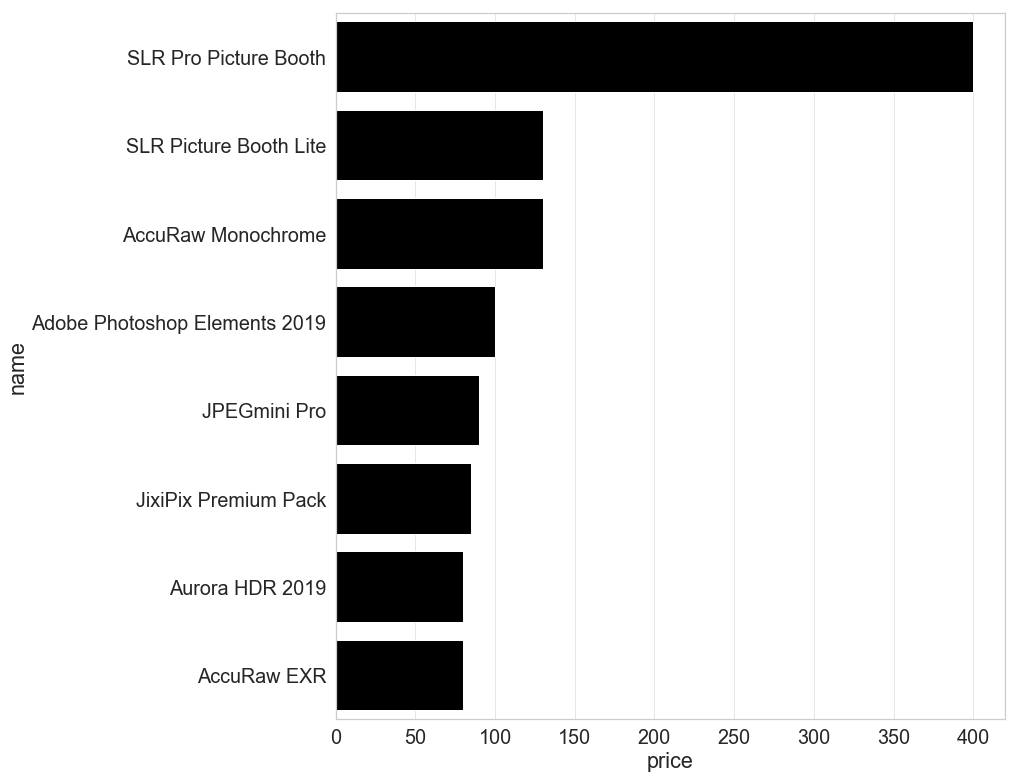

In [465]:
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
s = sns.barplot(x="price", y="name", data=top_expensive_papps, label=" ", color="black", ci = None)

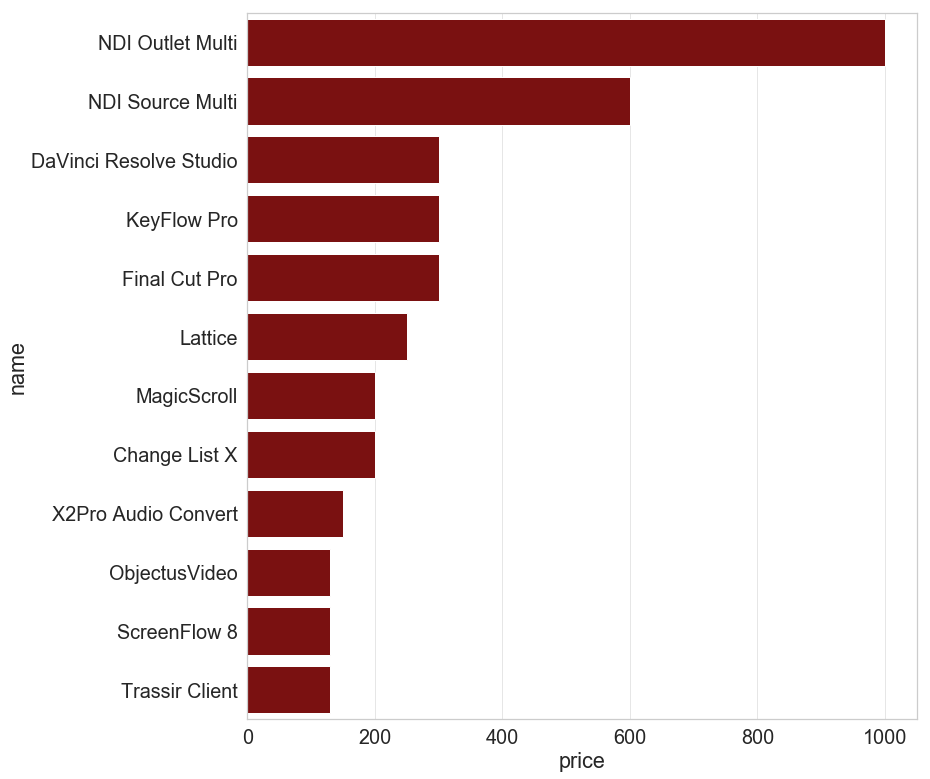

In [466]:
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
s = sns.barplot(x="price", y="name", data=top_expensive_vapps, label=" ", color="darkred", ci = None)

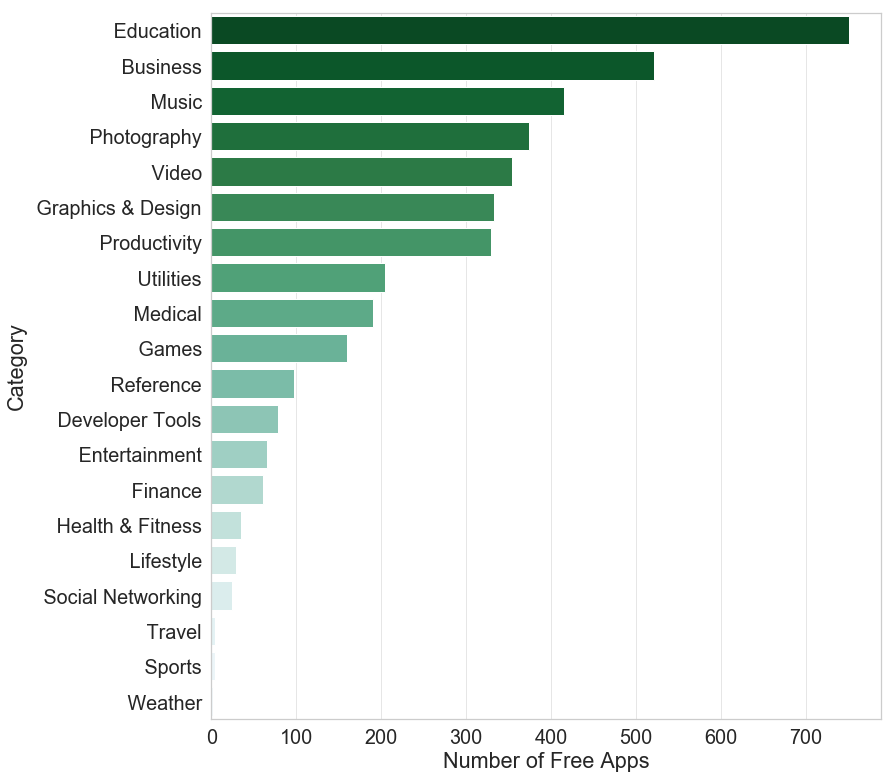

In [414]:
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
s = sns.countplot(y = 'category', data = free, palette= "BuGn_r", order = free['category'].value_counts().index)
plt.xlabel('Number of Free Apps') 
plt.ylabel('Category')
plt.show(s)

In [336]:
genre = mac_apps.groupby(['category', 'name'])
genre_count = mac_apps.category.value_counts().sort_values(ascending = False).reset_index()

In [120]:
genre_count.rename(columns={'index':'category', 'category':'count'}, inplace=True)

In [128]:
app_ratings = mac_apps[['category','name','size','price', 'rating']].sort_values(by='rating', ascending=False)[0:50]

In [468]:
filtered_rating = mac_apps.query('rating > 0.0')
#u_r = filtered_rating.rating.value_counts().reset_index()

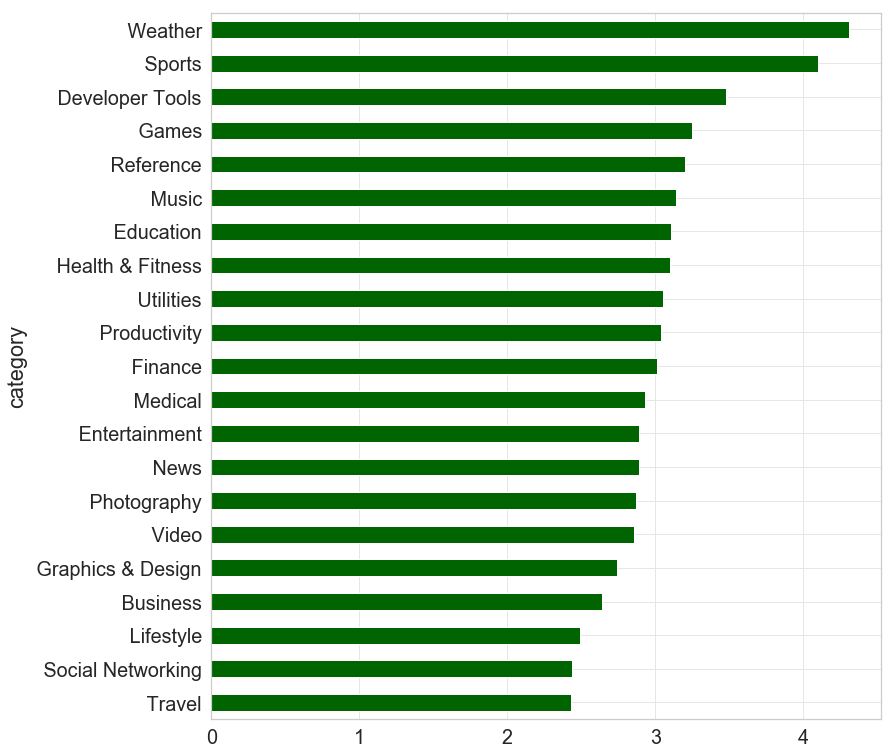

In [480]:
c_r = filtered_rating.groupby(['category'])['rating'].mean().sort_values().round(2).plot(kind='barh', color = 'darkgreen')
#cr = pd.DataFrame(c_r)

In [544]:
f = mac_apps.groupby(['category','total_languages']).count()

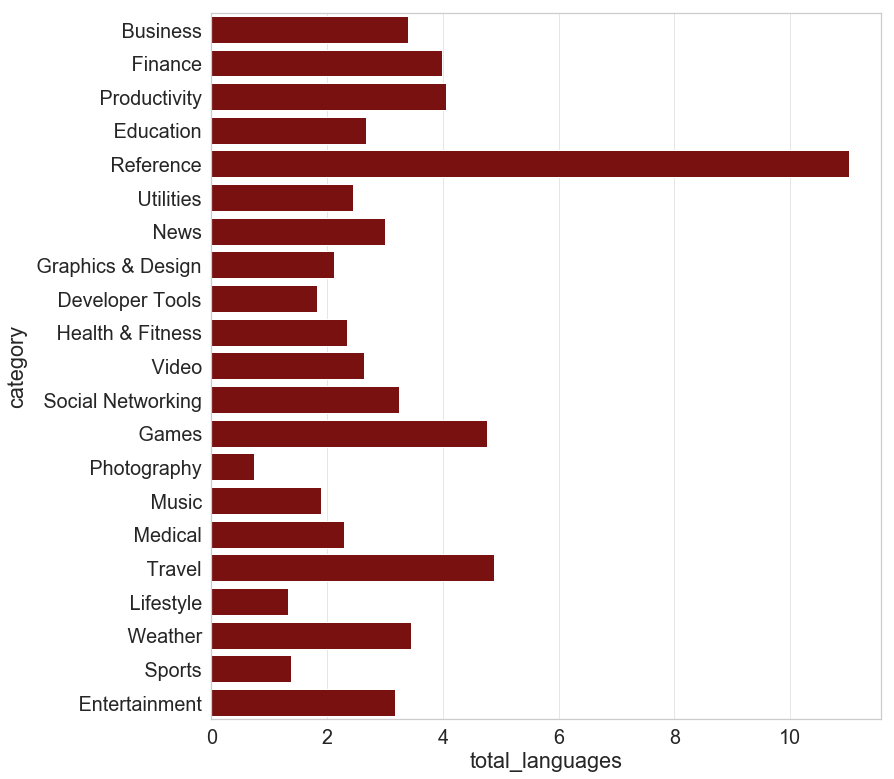

In [541]:
sns.barplot(x="total_languages", y="category", data= mac_apps, label=" ", color="darkred", ci = None)

In [484]:
cat = filtered_rating.groupby(['category','rating']).count()

In [539]:
mac_apps.head()

,category,compatibility,name,price,rating,size,total_languages,price_category
0,Business,OS X 10.8,Awesome Templates - for Microsoft Word Edition,10,1.0,125.1 MB,1,1
1,Business,OS X 10.11,BusyContacts,50,4.5,12.6 MB,10,1
2,Business,OS X 10.7,DW Spectrum,0,2.3,42 MB,1,0
3,Business,OS X 10.10,Contract Manager,5,1.0,50.5 MB,3,1
4,Business,OS 10.13,CuteNote,0,0.0,6.4 MB,2,0


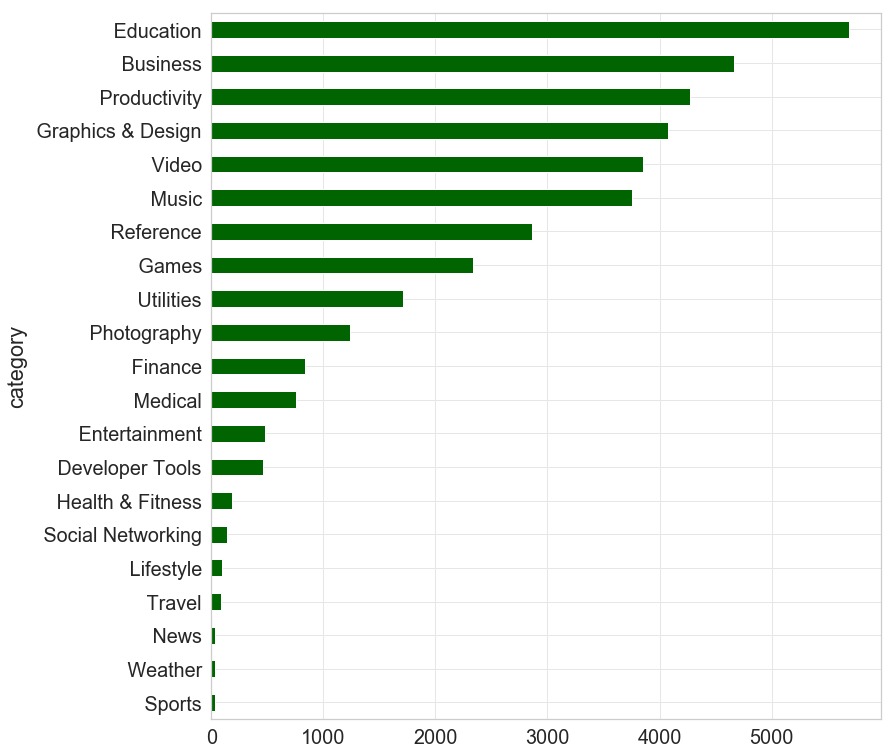

In [540]:
# Languages by Category
lang = mac_apps.groupby(['category'])['total_languages'].sum().sort_values().plot(kind='barh', color = 'darkgreen')

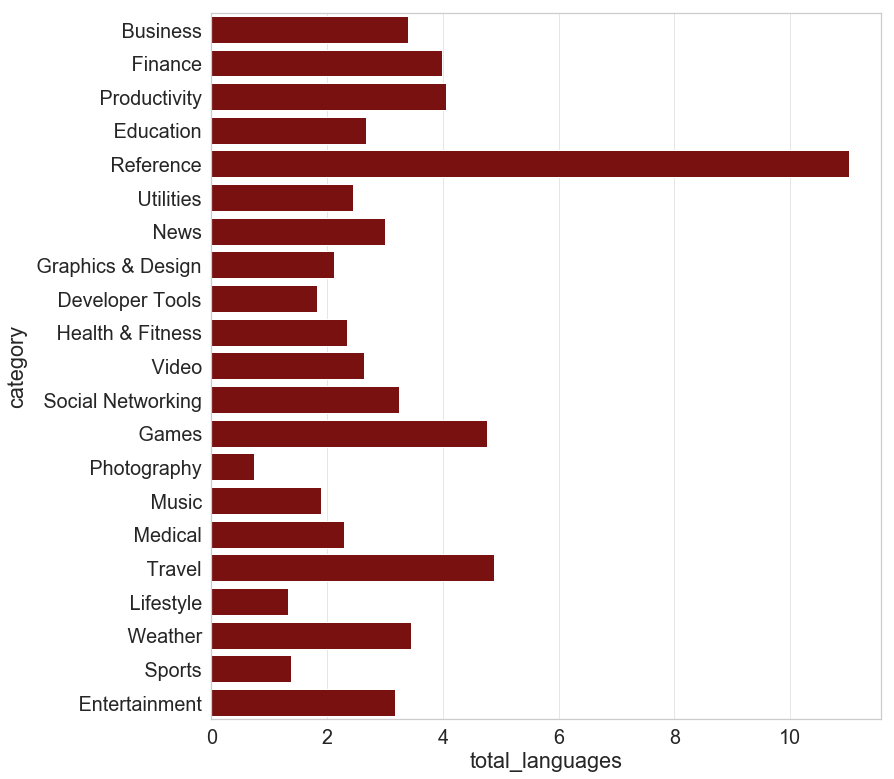

In [538]:
sns.set(style = 'whitegrid', font_scale = 1.8, rc={"figure.figsize": (12, 13), 'grid.color': '0.9'},)
s = sns.barplot(x="total_languages", y="category", data= mac_apps, label=" ", color="darkred", ci = None)

In [547]:
supporting_languages = mac_apps[['category','name','total_languages']].sort_values(by='total_languages', ascending=False)[0:20]

In [548]:
supporting_languages

,category,name,total_languages
443,Video,FlyPlayer2017,90
1017,Music,AudioBurner,74
1507,Graphics & Design,Album Express Pro,63
1506,Photography,Album Express Standard,63
890,Reference,Dansk Flersprogede ordbog,56
806,Reference,Dizionario Italiano Multilingue,56
836,Reference,DicéÝionar poliglot romÌ¢nÄ,56
838,Reference,Dictionnaire FranÌ¤ais Multilingue,56
9,Reference,French Italian dictionary,56
842,Reference,DicionÌÁrio PortuguÌ»s-MultilÌ_ngue,56


In [ ]:
# Information for Each App

In [487]:
business_rating = filtered_rating[filtered_rating['category'].str.contains('Business')]
business = business_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
b_rating_count = business.rating.value_counts().reset_index()
b_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [219]:
education_rating = filtered_rating[filtered_rating['category'].str.contains('Education')]
education = education_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
e_rating_count = education.rating.value_counts().reset_index()
e_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [221]:
productivity_rating = filtered_rating[filtered_rating['category'].str.contains('Productivity')]
productivity = productivity_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
p_rating_count = productivity.rating.value_counts().reset_index()
p_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [230]:
finance_rating = filtered_rating[filtered_rating['category'].str.contains('Finance')]
finance = finance_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
f_rating_count = finance.rating.value_counts().reset_index()
f_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [231]:
graphic_rating = filtered_rating[filtered_rating['category'].str.contains('Graphics & Design')]
graphics = graphic_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
g_rating_count = graphics.rating.value_counts().reset_index()
g_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [232]:
utilities_rating = filtered_rating[filtered_rating['category'].str.contains('Utilities')]
utility = utilities_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
u_rating_count = utility.rating.value_counts().reset_index()
u_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [233]:
developers_rating = filtered_rating[filtered_rating['category'].str.contains('Developer Tools')]
developer = developers_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
d_rating_count = developer.rating.value_counts().reset_index()
d_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [234]:
news_rating = filtered_rating[filtered_rating['category'].str.contains('News')]
news = news_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
n_rating_count = news.rating.value_counts().reset_index()
n_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [235]:
video_rating = filtered_rating[filtered_rating['category'].str.contains('Video')]
video = video_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
v_rating_count = video.rating.value_counts().reset_index()
v_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [236]:
social_rating = filtered_rating[filtered_rating['category'].str.contains('Social Networking')]
social = social_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
s_rating_count = social.rating.value_counts().reset_index()
s_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [237]:
photo_rating = filtered_rating[filtered_rating['category'].str.contains('Photography')]
photo = photo_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
ph_rating_count = photo.rating.value_counts().reset_index()
ph_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [238]:
reference_rating = filtered_rating[filtered_rating['category'].str.contains('Reference')]
reference = reference_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
re_rating_count = reference.rating.value_counts().reset_index()
re_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [239]:
medical_rating = filtered_rating[filtered_rating['category'].str.contains('Medical')]
medical = medical_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
me_rating_count = medical.rating.value_counts().reset_index()
me_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [240]:
travel_rating = filtered_rating[filtered_rating['category'].str.contains('Travel')]
travel = travel_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
tra_rating_count = travel.rating.value_counts().reset_index()
tra_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [241]:
lifestyle_rating = filtered_rating[filtered_rating['category'].str.contains('Lifestyle')]
lifestyle = lifestyle_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
li_rating_count = lifestyle.rating.value_counts().reset_index()
li_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [508]:
weather_rating = filtered_rating[filtered_rating['category'].str.contains('Weather')]
weather = weather_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
we_rating_count = weather.rating.value_counts().reset_index()
we_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [244]:
games_rating = filtered_rating[filtered_rating['category'].str.contains('Games')]
games = games_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
games_rating_count = games.rating.value_counts().reset_index()
games_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [245]:
entertainment_rating = filtered_rating[filtered_rating['category'].str.contains('Entertainment')]
entertainment = entertainment_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
entertain_rating_count = entertainment.rating.value_counts().reset_index()
entertain_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [246]:
music_rating = filtered_rating[filtered_rating['category'].str.contains('Music')]
music = music_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
music_rating_count = music.rating.value_counts().reset_index()
music_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [247]:
health_rating = filtered_rating[filtered_rating['category'].str.contains('Health & Fitness')]
health = health_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
health_rating_count = health.rating.value_counts().reset_index()
health_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [248]:
sports_rating = filtered_rating[filtered_rating['category'].str.contains('Sports')]
sports = sports_rating[['category','name','size','rating', 'price','price_category']].sort_values(by= 'rating', ascending = False)
sports_rating_count = sports.rating.value_counts().reset_index()
sports_rating_count.rename(columns={'index':'rating', 'rating':'count'}, inplace=True)

In [ ]:
# Look at Languages